# UAA/NKE Geolocation Research

# Part 1: Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime, timedelta

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":24,"axes.labelsize":18,
                             "xtick.labelsize":15,"ytick.labelsize":15})
#'font.family':'serif', 'font.serif':'Times New Roman'

## 1. Geolocation (Customer Traffic)

### 1.1 Preparation 

In [2]:
ua_geo = pd.read_csv('UA_Geo.csv')
nike_geo = pd.read_csv('NIKE_Geo.csv')
ua_geo.head()

,Unnamed: 0,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,latitude,longitude
0,0,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19,41.89269,-87.62455
1,1,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19,41.89269,-87.62455
2,2,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19,41.89269,-87.62455
3,3,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,36.05271,-115.16950
4,4,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,36.05271,-115.16950


In [3]:
ua_geo.drop(['Unnamed: 0', 'latitude', 'longitude'], axis = 1, inplace = True)
nike_geo.drop(['Unnamed: 0', 'latitude', 'longitude'], axis = 1, inplace = True)

In [4]:
print(ua_geo.shape)
print(nike_geo.shape)

(2873531, 5)
(2214794, 5)


In [5]:
ua_geo.head()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id
0,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19
1,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19
2,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19
3,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33
4,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33


### 1.2 Plots of Data

#### 30-min & 3-hour Plots

In [6]:
ua_geo['time'] = pd.DatetimeIndex(pd.to_datetime(ua_geo['UTCtimestamp'], unit = 'ms')).tz_localize('UTC')
ua_geo = ua_geo.set_index('time')
ua_geo['ua_count'] = 1
ua_geo.index = ua_geo.index.tz_convert('America/New_York').tz_localize(None)
ua_geo.head()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count
time,,,,,,
2017-12-31 19:47:16.186,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19,1
2017-12-31 19:24:25.060,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19,1
2017-12-31 19:47:27.000,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19,1
2017-12-31 20:51:59.003,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,1
2017-12-31 20:52:02.614,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,1


In [7]:
ua_geo.tail()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count
time,,,,,,
2018-06-17 18:16:31.948,1529273791948,9943E1E9-379E-4E9F-BA98-47538C230217,29.92388,-81.41736,14,1
2018-06-17 18:37:48.617,1529275068617,64362F68-8DEC-4624-BCF2-C51D2038BFA3,29.92456,-81.41754,14,1
2018-06-17 18:37:56.000,1529275076000,64362F68-8DEC-4624-BCF2-C51D2038BFA3,29.92429,-81.41711,14,1
2018-06-17 19:03:38.448,1529276618448,61F4FB1B-8FC3-4EFF-B9B1-1886211CC9B3,29.92470,-81.41756,14,1
2018-06-17 19:46:07.050,1529279167050,AE78F1CF-C113-41C8-8F28-3BFC0E2F1A0E,29.92455,-81.41660,14,1


In [8]:
ua_geo = ua_geo['2018'] # keep data ranging from 2018-01-01 to 2018-06-17
ua_geo.shape

(2870757, 6)

In [9]:
nike_geo['time'] = pd.DatetimeIndex(pd.to_datetime(nike_geo['UTCtimestamp'], unit='ms')).tz_localize('UTC')
nike_geo = nike_geo.set_index('time')
nike_geo['nike_count'] = 1
nike_geo.index = nike_geo.index.tz_convert('America/New_York').tz_localize(None)
nike_geo = nike_geo['2018']
nike_geo.shape

(2212528, 6)

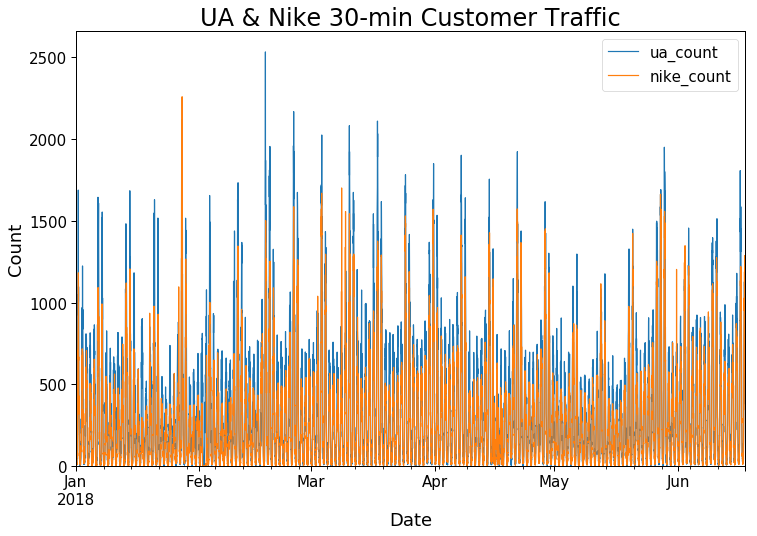

In [10]:
figure(figsize = (12,8))
ua_geo['ua_count'].resample('30T').sum().plot()
nike_geo['nike_count'].resample('30T').sum().plot()
plt.title('UA & Nike 30-min Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.ylim(bottom=0) 
plt.show()

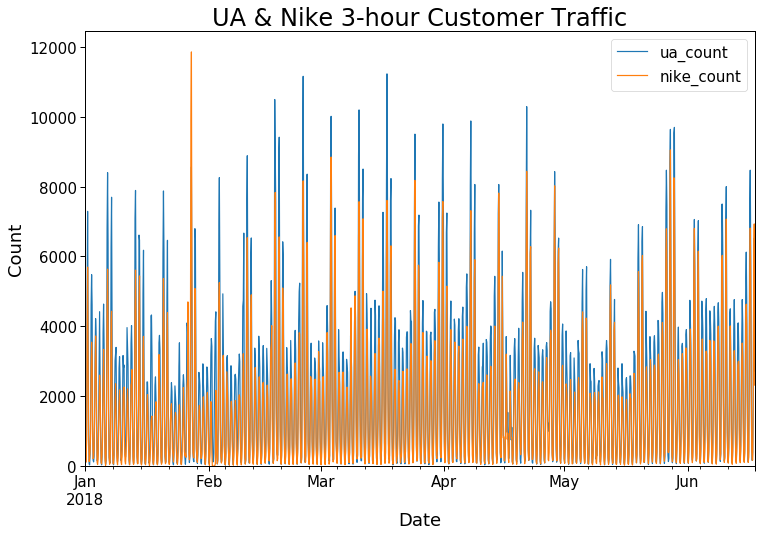

In [11]:
figure(figsize = (12,8))
ua_geo['ua_count'].resample('3H').sum().plot()
nike_geo['nike_count'].resample('3H').sum().plot()
plt.title('UA & Nike 3-hour Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.ylim(bottom=0) 
plt.show()

#### Daily Data Plot

Text(0, 0.5, 'Count')

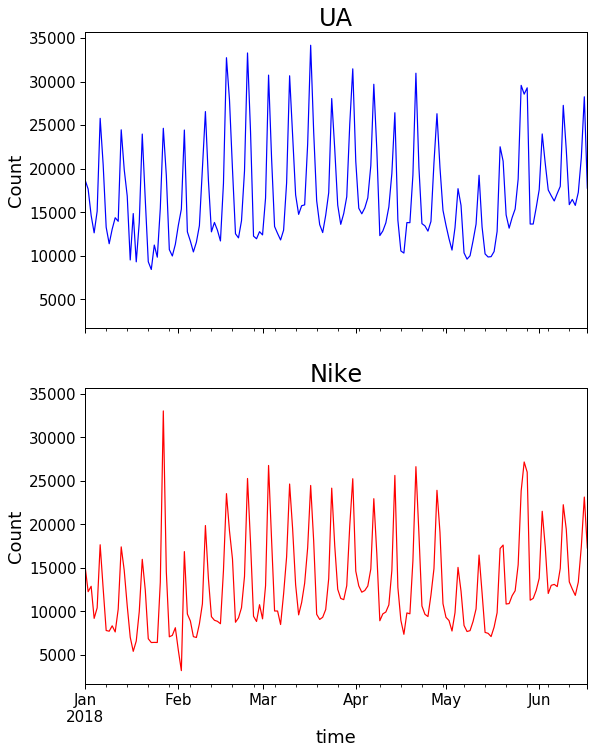

In [12]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9,12))
ua_geo['ua_count'].resample('D').sum().plot(color='blue', ax=ax[0])
nike_geo['nike_count'].resample('D').sum().plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

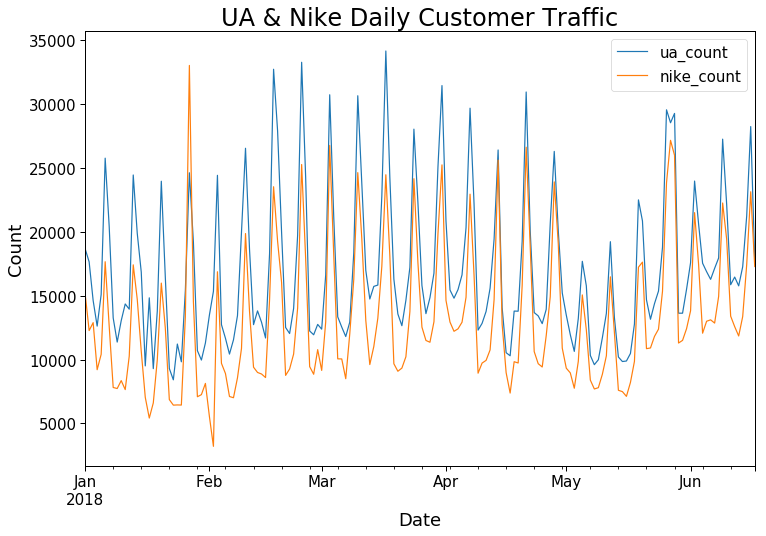

In [13]:
figure(figsize = (12,8))
ua_geo['ua_count'].resample('D').sum().plot()
nike_geo['nike_count'].resample('D').sum().plot()
plt.title('UA & Nike Daily Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.show()

#### Weekly Data Plot

Text(0, 0.5, 'Count')

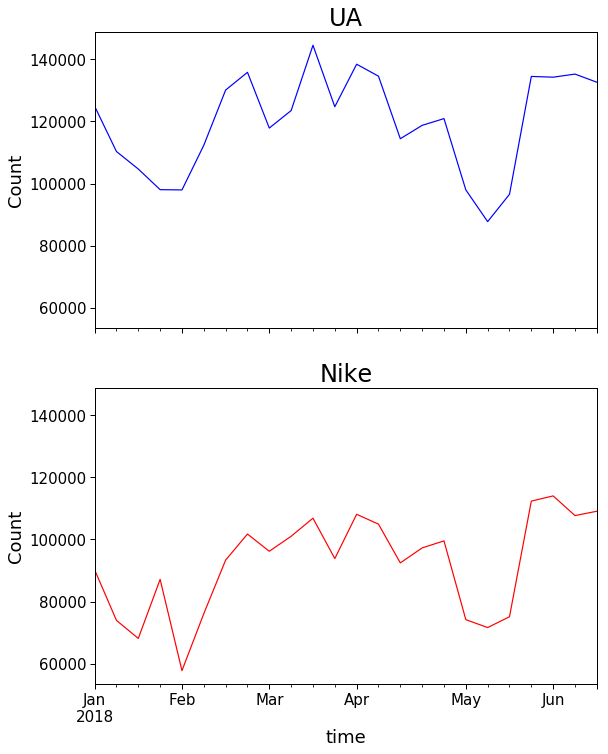

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 12))
ua_geo['ua_count'].resample('W').sum().plot(color = 'blue', ax=ax[0])
nike_geo['nike_count'].resample('W').sum().plot(color = 'red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

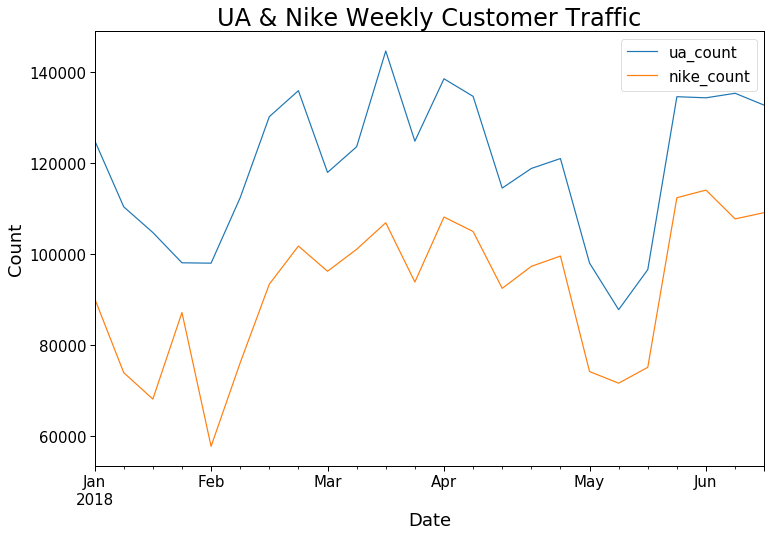

In [15]:
figure(figsize = (12,8))
ua_geo['ua_count'].resample('W').sum().plot()
nike_geo['nike_count'].resample('W').sum().plot()
plt.title('UA & Nike Weekly Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.show()

### 1.3 UA headquarter on the map (06/06)

In [16]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

In [17]:
loc = pd.read_csv('ua_nike_0.2_1.csv')
loc.head()

,ua_ID,ua_new,ua_fileid,ua_latitude,ua_longitude,timezone,nike_ID,nike_new,nike_fileid,nike_latitude,nike_longitude,timezone.1
0,1,1,20180607,30.37425,-87.67827,America/Chicago,3,1,20180607,30.37657,-87.67756,America/Chicago
1,13,2,20180607,32.54514,-117.04300,America/Los_Angeles,15,2,20180607,32.54407,-117.03850,America/Los_Angeles
2,14,3,20180607,33.92527,-116.81070,America/Los_Angeles,16,3,20180607,33.92674,-116.81320,America/Los_Angeles
3,18,4,20180607,37.02212,-121.56100,America/Los_Angeles,27,4,20180607,37.02078,-121.56460,America/Los_Angeles
4,15,5,20180607,34.21361,-119.05880,America/Los_Angeles,30,5,20180607,34.21603,-119.05710,America/Los_Angeles


In [18]:
loc.drop(['ua_ID','ua_fileid','nike_ID','nike_fileid','timezone.1'], axis = 1, inplace = True)
loc.head()

,ua_new,ua_latitude,ua_longitude,timezone,nike_new,nike_latitude,nike_longitude
0,1,30.37425,-87.67827,America/Chicago,1,30.37657,-87.67756
1,2,32.54514,-117.04300,America/Los_Angeles,2,32.54407,-117.03850
2,3,33.92527,-116.81070,America/Los_Angeles,3,33.92674,-116.81320
3,4,37.02212,-121.56100,America/Los_Angeles,4,37.02078,-121.56460
4,5,34.21361,-119.05880,America/Los_Angeles,5,34.21603,-119.05710


In [19]:
UAA = (39.2752, -76.5913)

map0 = folium.Map(location=UAA, zoom_start=6)

for each in loc.iterrows():
    folium.Marker(
        location = [each[1]['ua_latitude'],each[1]['ua_longitude']],popup='Under Armour',icon=folium.Icon(color='green', icon='cloud', angle=0, prefix='fa')).add_to(map0)
for each in loc.iterrows():
    folium.Marker(
        location = [each[1]['nike_latitude'],each[1]['nike_longitude']],popup='Nike',icon=folium.Icon(color='red', icon='male', angle=0, prefix='fa')).add_to(map0)  
for each in loc.iterrows():
    folium.Circle(
        location = [each[1]['ua_latitude'],each[1]['ua_longitude']],
        radius=100,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(map0)
for each in loc.iterrows():
    folium.Circle(
        location = [each[1]['nike_latitude'],each[1]['nike_longitude']],
        radius=100,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(map0)

In [20]:
marker_cluster = MarkerCluster().add_to(map0)

for each in ua_geo['2018-06-06'].iterrows():
    folium.Marker(
        location = [each[1]['deviceLatitude'],each[1]['deviceLongitude']]).add_to(marker_cluster)
for each in nike_geo['2018-06-06'].iterrows():
    folium.Marker(
        location = [each[1]['deviceLatitude'],each[1]['deviceLongitude']]).add_to(marker_cluster)

In [21]:
map0.save('map0606.html')

### 1.4 UA headquarter heatmap 

In [22]:
UAA = (39.2752, -76.5913)

map1 = folium.Map(location=UAA, zoom_start=6)

for each in loc.iterrows():
    folium.Marker(
        location = [each[1]['ua_latitude'],each[1]['ua_longitude']],popup='Under Armour',icon=folium.Icon(color='green', icon='cloud', angle=0, prefix='fa')).add_to(map1)
for each in loc.iterrows():
    folium.Marker(
        location = [each[1]['nike_latitude'],each[1]['nike_longitude']],popup='Nike',icon=folium.Icon(color='red', icon='male', angle=0, prefix='fa')).add_to(map1) 
for each in loc.iterrows():
    folium.Circle(
        location = [each[1]['ua_latitude'],each[1]['ua_longitude']],
        radius=100,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(map1)
for each in loc.iterrows():
    folium.Circle(
        location = [each[1]['nike_latitude'],each[1]['nike_longitude']],
        radius=100,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(map1)

In [23]:
ua_h = ua_geo['2018-05'].reset_index()
nike_h = nike_geo['2018-05'].reset_index()

ua_h['day'] = nike_h.time.dt.day
nike_h['day'] = nike_h.time.dt.day

In [24]:
ua_h.head()

,time,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count,day
0,2018-05-01 00:05:11.000,1525147511000,0257CD35-CB41-414E-B67F-886FC94D4CE2,41.89335,-87.62473,19,1,1.0
1,2018-05-01 00:13:23.389,1525148003389,813F50F9-C7E6-40D4-8BD5-7061DFD0CCA7,41.89291,-87.62370,19,1,1.0
2,2018-05-01 00:26:16.654,1525148776654,8384D0C6-7203-44D4-83E6-5801C3AFD05F,41.89345,-87.62428,19,1,1.0
3,2018-05-01 00:41:17.600,1525149677600,F1A1983C-3253-4D47-A27D-A5EE5CA052F0,41.89234,-87.62420,19,1,1.0
4,2018-05-01 00:42:02.965,1525149722965,4F14DB7F-031B-44B5-A2C2-520BF433FA3F,41.89191,-87.62411,19,1,1.0


In [25]:
heat_ua = ua_h[['deviceLatitude', 'deviceLongitude','day']]
heat_nike = nike_h[['deviceLatitude', 'deviceLongitude','day']]

print(heat_ua.shape)
print(heat_nike.shape)

(473625, 3)
(383592, 3)


In [26]:
heat_ua_nike = pd.concat([heat_ua, heat_nike])
heat_ua_nike.shape

(857217, 3)

In [27]:
heat_data = [[[row['deviceLatitude'], row['deviceLongitude']] 
              for index, row in heat_ua_nike[heat_ua_nike['day'] == i].iterrows()] 
             for i in range(1,32)]
len(heat_data)

31

In [28]:
time_index = [
    (datetime(2018,5,1) + k * timedelta(days=1)).strftime('%Y-%m-%d') for k in range(0,31)
]

In [29]:
tshm = plugins.HeatMapWithTime(heat_data, auto_play=False, max_opacity=0.8, index=time_index)
tshm.add_to(map1)
map1.save('heatmap_May.html')

## 2. Stock & Twitter Data

### 2.1 Preparation

In [30]:
uatwt_stk = pd.read_csv('UA_Tweet.csv')
uatwt_stk.head()

,Date,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
0,7/11/18 19:30:00,NaN,NaN,NaN,NaN,1.0,1.0
1,7/11/18 19:00:00,22.24,200,22.24,NaN,NaN,NaN
2,7/11/18 18:30:00,22.24,300,22.24,NaN,3.0,3.0
3,7/11/18 18:00:00,NaN,NaN,NaN,0.0000,2.0,2.0
4,7/11/18 17:30:00,NaN,NaN,NaN,0.1068,2.0,NaN


In [31]:
uatwt_stk['Date'] = pd.to_datetime(uatwt_stk['Date'])
uatwt_stk.set_index('Date', inplace = True)
uatwt_stk = uatwt_stk.sort_index()['2018-01-01':'2018-06-17']
uatwt_stk.head()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 05:00:00,NaN,NaN,NaN,0.0732,3.0,1.0
2018-01-02 05:30:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 06:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 07:00:00,NaN,NaN,NaN,NaN,4.0,4.0


In [32]:
niketwt_stk = pd.read_csv('NIKE_Tweet.csv')
niketwt_stk['Date'] = pd.to_datetime(niketwt_stk['Date'])
niketwt_stk.set_index('Date', inplace = True)
niketwt_stk = niketwt_stk.sort_index()['2018-01-01':'2018-06-17']
niketwt_stk.tail()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-06-15 17:30:00,75.99,600,75.99,NaN,6.0,6.0
2018-06-15 18:00:00,NaN,NaN,NaN,0.0899,7.0,4.0
2018-06-15 18:30:00,75.84,0,75.84,0.0000,2.0,2.0
2018-06-15 19:00:00,NaN,NaN,NaN,-0.0549,6.0,2.0
2018-06-15 19:30:00,75.84,300,75.84,0.0000,8.0,8.0


In [33]:
print(uatwt_stk.Volume.dtype)
print(niketwt_stk.Volume.dtype)

object
object


In [34]:
uatwt_stk.Volume.str.extract('([a-zA-Z])', expand=False).value_counts()

k    1477
M     122
Name: Volume, dtype: int64

In [35]:
niketwt_stk.Volume.str.extract('([a-zA-Z])', expand=False).value_counts()

k    1497
M     125
Name: Volume, dtype: int64

In [36]:
ua_num = uatwt_stk.Volume.str.extract('(\d+(\.\d+)?)', expand=False).iloc[:,0].astype('float64')
ua_unit = uatwt_stk.Volume.str.extract('([a-zA-Z])', expand=False)
ua_unit = np.where(ua_unit=='M', 1000000, np.where(ua_unit=='k', 1000, np.where(np.isnan(ua_num), 0, 1)))
uatwt_stk.Volume = ua_num * ua_unit

nike_num = niketwt_stk.Volume.str.extract('(\d+(\.\d+)?)', expand=False).iloc[:,0].astype('float64')
nike_unit = niketwt_stk.Volume.str.extract('([a-zA-Z])', expand=False)
nike_unit = np.where(nike_unit=='M', 1000000, np.where(nike_unit=='k', 1000, np.where(np.isnan(nike_num), 0, 1)))
niketwt_stk.Volume = nike_num * nike_unit

print(uatwt_stk.Volume.dtype)
print(niketwt_stk.Volume.dtype)

float64
float64


In [37]:
print(uatwt_stk.shape)
print(niketwt_stk.shape)

(3460, 6)
(3624, 6)


In [38]:
uatwt_stk.rename(columns = {'Twttr Sent(Real time)':'ua_tweet',
                            'Lst Trd/Lst Px':'ua_price',
                            'Volume':'ua_stkv',
                            'Twttr Pub Cnt':'ua_twtcount'}, 
                 inplace = True)

niketwt_stk.rename(columns = {'Twttr Sent(Real time)':'nike_tweet',
                              'Lst Trd/Lst Px':'nike_price',
                              'Volume':'nike_stkv',
                              'Twttr Pub Cnt':'nike_twtcount'}, 
                 inplace = True)

In [39]:
uatwt_stk.head()

,ua_price,ua_stkv,Twttr Sent,ua_tweet,ua_twtcount,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 05:00:00,NaN,NaN,NaN,0.0732,3.0,1.0
2018-01-02 05:30:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 06:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 07:00:00,NaN,NaN,NaN,NaN,4.0,4.0


In [40]:
niketwt_stk.head()

,nike_price,nike_stkv,Twttr Sent,nike_tweet,nike_twtcount,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,NaN,5.0,5.0
2018-01-02 04:30:00,NaN,NaN,NaN,NaN,2.0,2.0
2018-01-02 05:00:00,62.36,641.0,62.36,NaN,4.0,4.0
2018-01-02 05:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,13.0,13.0


### 2.2 Twitter

Text(0, 0.5, 'Twitter Sent (Real time)')

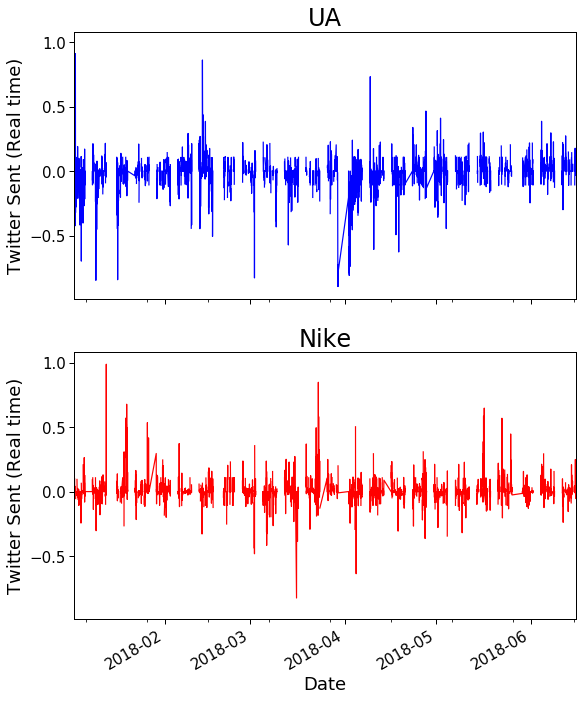

In [41]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 12))

uatwt_stk['ua_tweet'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_tweet'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Twitter Sent (Real time)')
ax[1].set_ylabel('Twitter Sent (Real time)')

Text(0, 0.5, 'Total Twitter Sent')

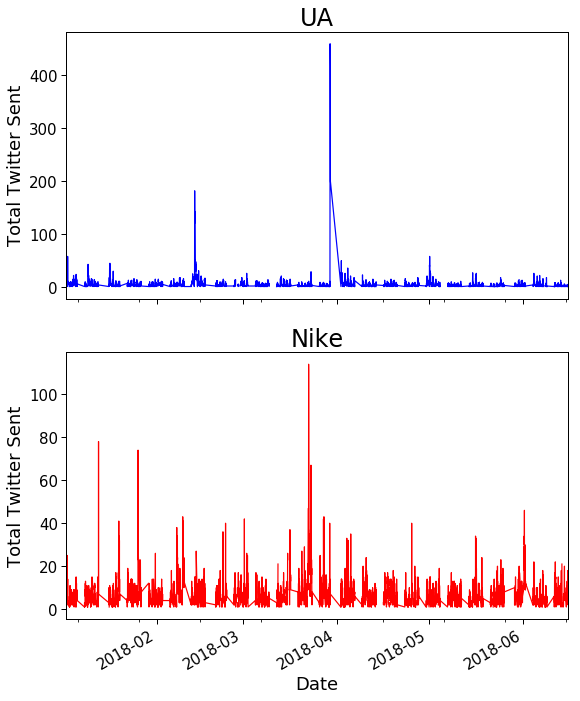

In [42]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_twtcount'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_twtcount'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Total Twitter Sent')
ax[1].set_ylabel('Total Twitter Sent')

### 2.3 Stock

Text(0, 0.5, 'Price')

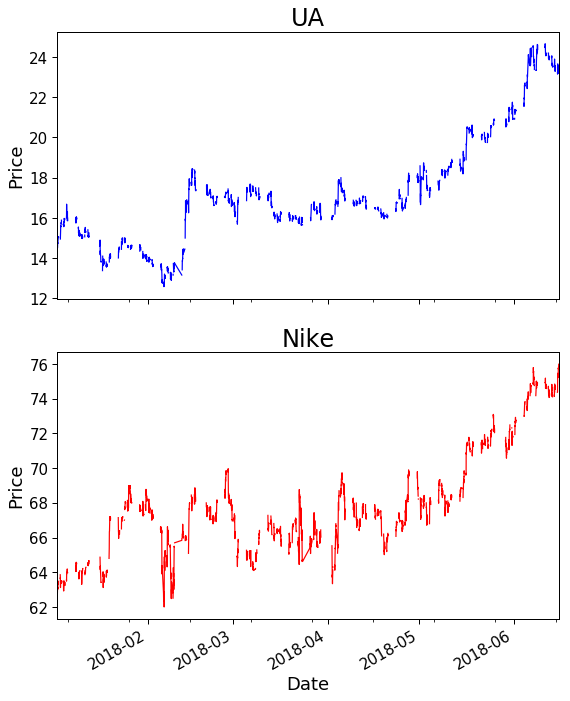

In [43]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_price'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_price'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Price')
ax[1].set_ylabel('Price')

## Seems like lots of outliers here!!! WHY?

Text(0, 0.5, 'Volumn')

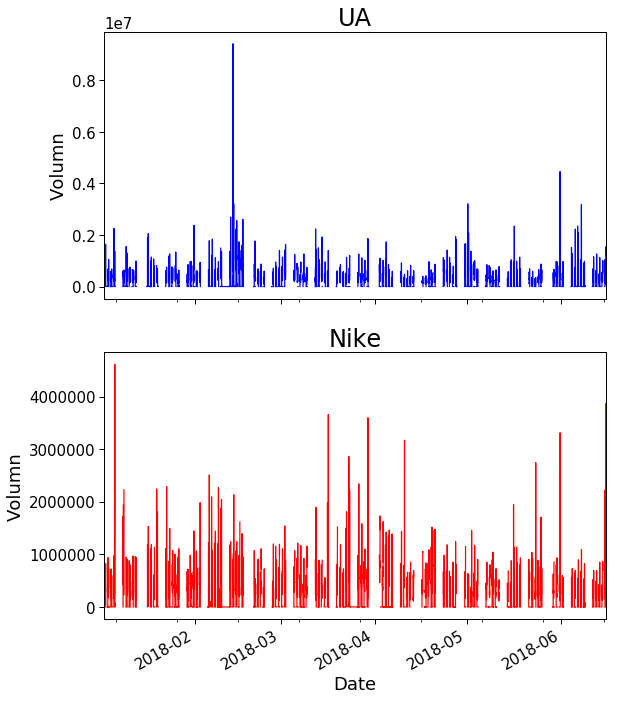

In [44]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_stkv'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_stkv'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Volumn')
ax[1].set_ylabel('Volumn')

## 3. Putting All Features Together

### 3.1 Create a New Dataset

In [45]:
alldata = pd.concat([ua_geo['ua_count'].resample('30T').sum(), 
                    nike_geo['nike_count'].resample('30T').sum(),
                    uatwt_stk['ua_price'], niketwt_stk['nike_price'],
                    uatwt_stk['ua_stkv'],niketwt_stk['nike_stkv'],
                    uatwt_stk['ua_tweet'],niketwt_stk['nike_tweet'],
                    uatwt_stk['ua_twtcount'],niketwt_stk['nike_twtcount']
                   ], axis=1)
alldata.shape

(8056, 10)

In [46]:
alldata = alldata['2018']

In [47]:
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
alldata.tail()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
2018-06-17 17:30:00,1015,940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 18:00:00,874,874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 18:30:00,724,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 19:00:00,740,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 19:30:00,382,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
alldata['count_ratio'] = alldata['ua_count'] / alldata['nike_count']
alldata['price_ratio'] = alldata['ua_price'] / alldata['nike_price']
alldata['tweet_diff'] = alldata['ua_tweet'] - alldata['nike_tweet']
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN


In [50]:
alldata.shape

(8056, 13)

In [51]:
alldata[alldata['count_ratio'] <= 50].shape # see if there are abnormal data

(8000, 13)

In [52]:
alldata.to_csv("alldata.csv", sep=',')

In [53]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8056 entries, 2018-01-01 00:00:00 to 2018-06-17 19:30:00
Data columns (total 13 columns):
ua_count         8056 non-null int64
nike_count       8056 non-null int64
ua_price         2352 non-null float64
nike_price       2534 non-null float64
ua_stkv          2352 non-null float64
nike_stkv        2534 non-null float64
ua_tweet         2297 non-null float64
nike_tweet       2495 non-null float64
ua_twtcount      3250 non-null float64
nike_twtcount    3523 non-null float64
count_ratio      8053 non-null float64
price_ratio      2142 non-null float64
tweet_diff       1649 non-null float64
dtypes: float64(11), int64(2)
memory usage: 881.1 KB


### 3.2 Using the Dataset

In [54]:
alldata1 = pd.read_csv('alldata.csv')
alldata1 = alldata1.rename(columns={'Unnamed: 0':'time'})
alldata1['time'] = pd.DatetimeIndex(pd.to_datetime(alldata1['time']))
alldata1 = alldata1.set_index('time')
alldata1.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff
time,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN


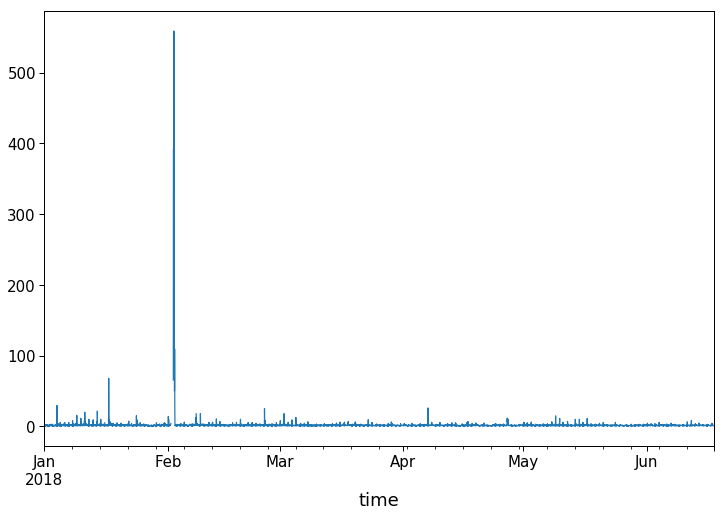

In [55]:
alldata1.count_ratio.plot(figsize=(12,8))

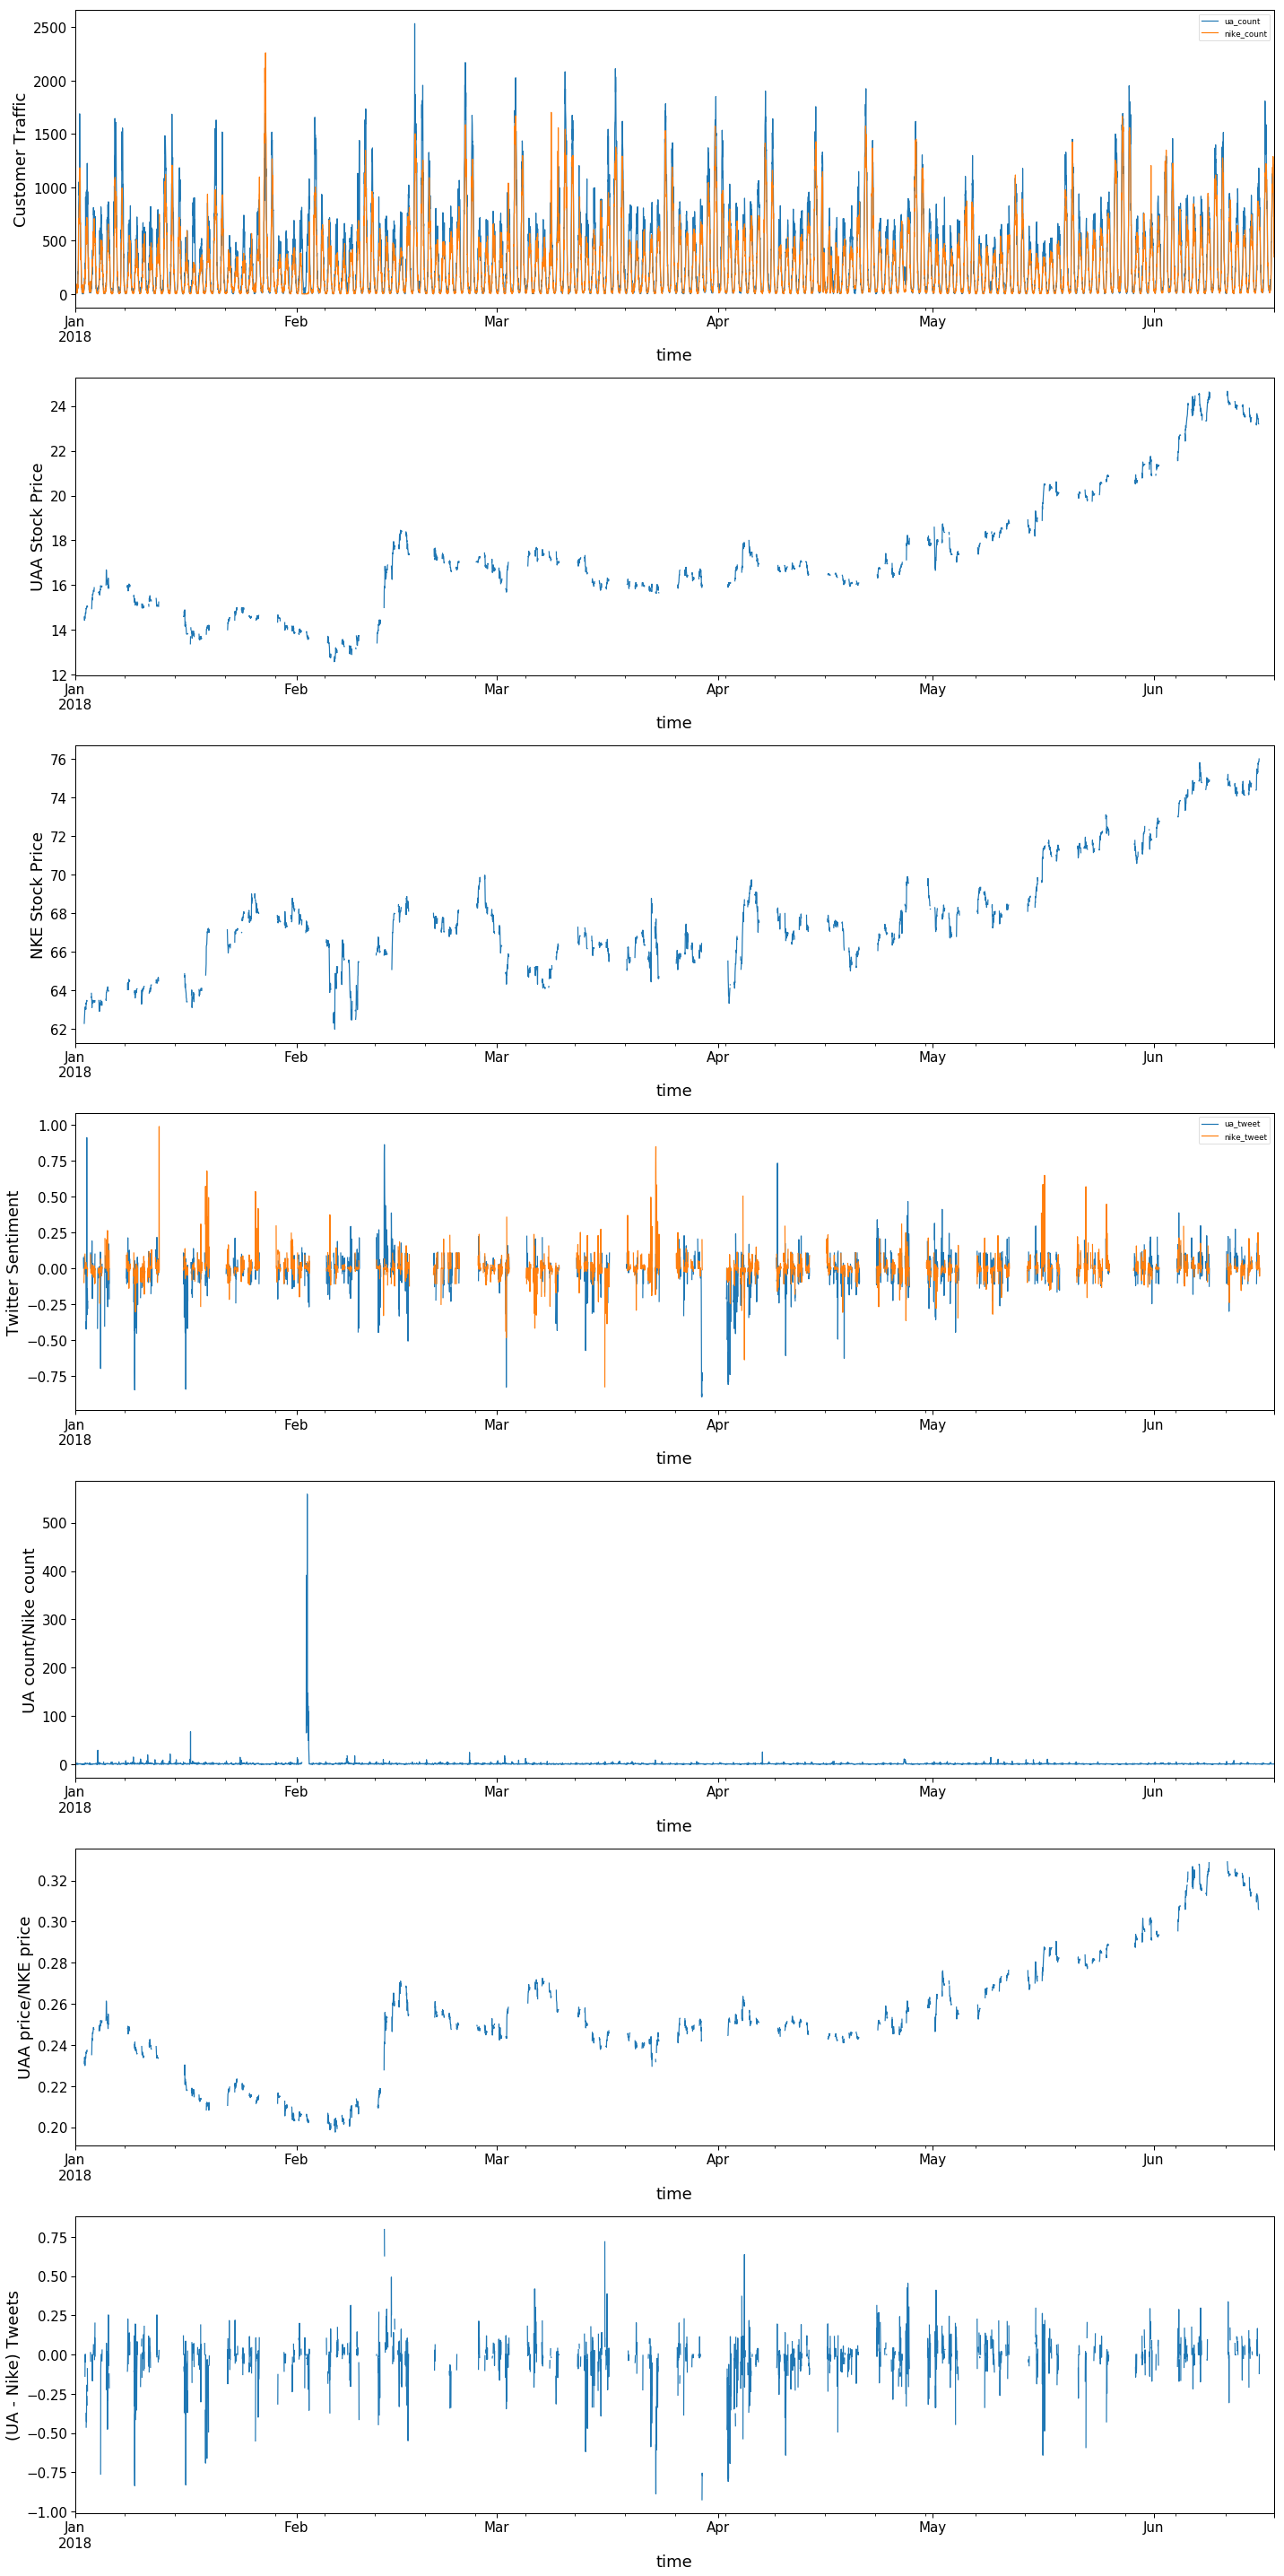

In [56]:
fig=plt.figure(figsize=(20,40))

axes1=fig.add_subplot(7,1,1)
alldata1[['ua_count','nike_count']].plot(ax=axes1)

axes2=fig.add_subplot(7,1,2)
alldata1['ua_price'].plot(ax=axes2)

axes3=fig.add_subplot(7,1,3)
alldata1['nike_price'].plot(ax=axes3)

axes4=fig.add_subplot(7,1,4)
alldata1[['ua_tweet', 'nike_tweet']].plot(ax=axes4)

axes5=fig.add_subplot(7,1,5)
alldata1['count_ratio'].plot(ax=axes5)

axes6=fig.add_subplot(7,1,6)
alldata1['price_ratio'].plot(ax=axes6)

axes7=fig.add_subplot(7,1,7)
alldata1['tweet_diff'].plot(ax=axes7)

axes1.set_ylabel('Customer Traffic')
axes2.set_ylabel('UAA Stock Price')
axes3.set_ylabel('NKE Stock Price')
axes4.set_ylabel('Twitter Sentiment')
axes5.set_ylabel('UA count/Nike count')
axes6.set_ylabel('UAA price/NKE price')
axes7.set_ylabel('(UA - Nike) Tweets')

plt.tight_layout()

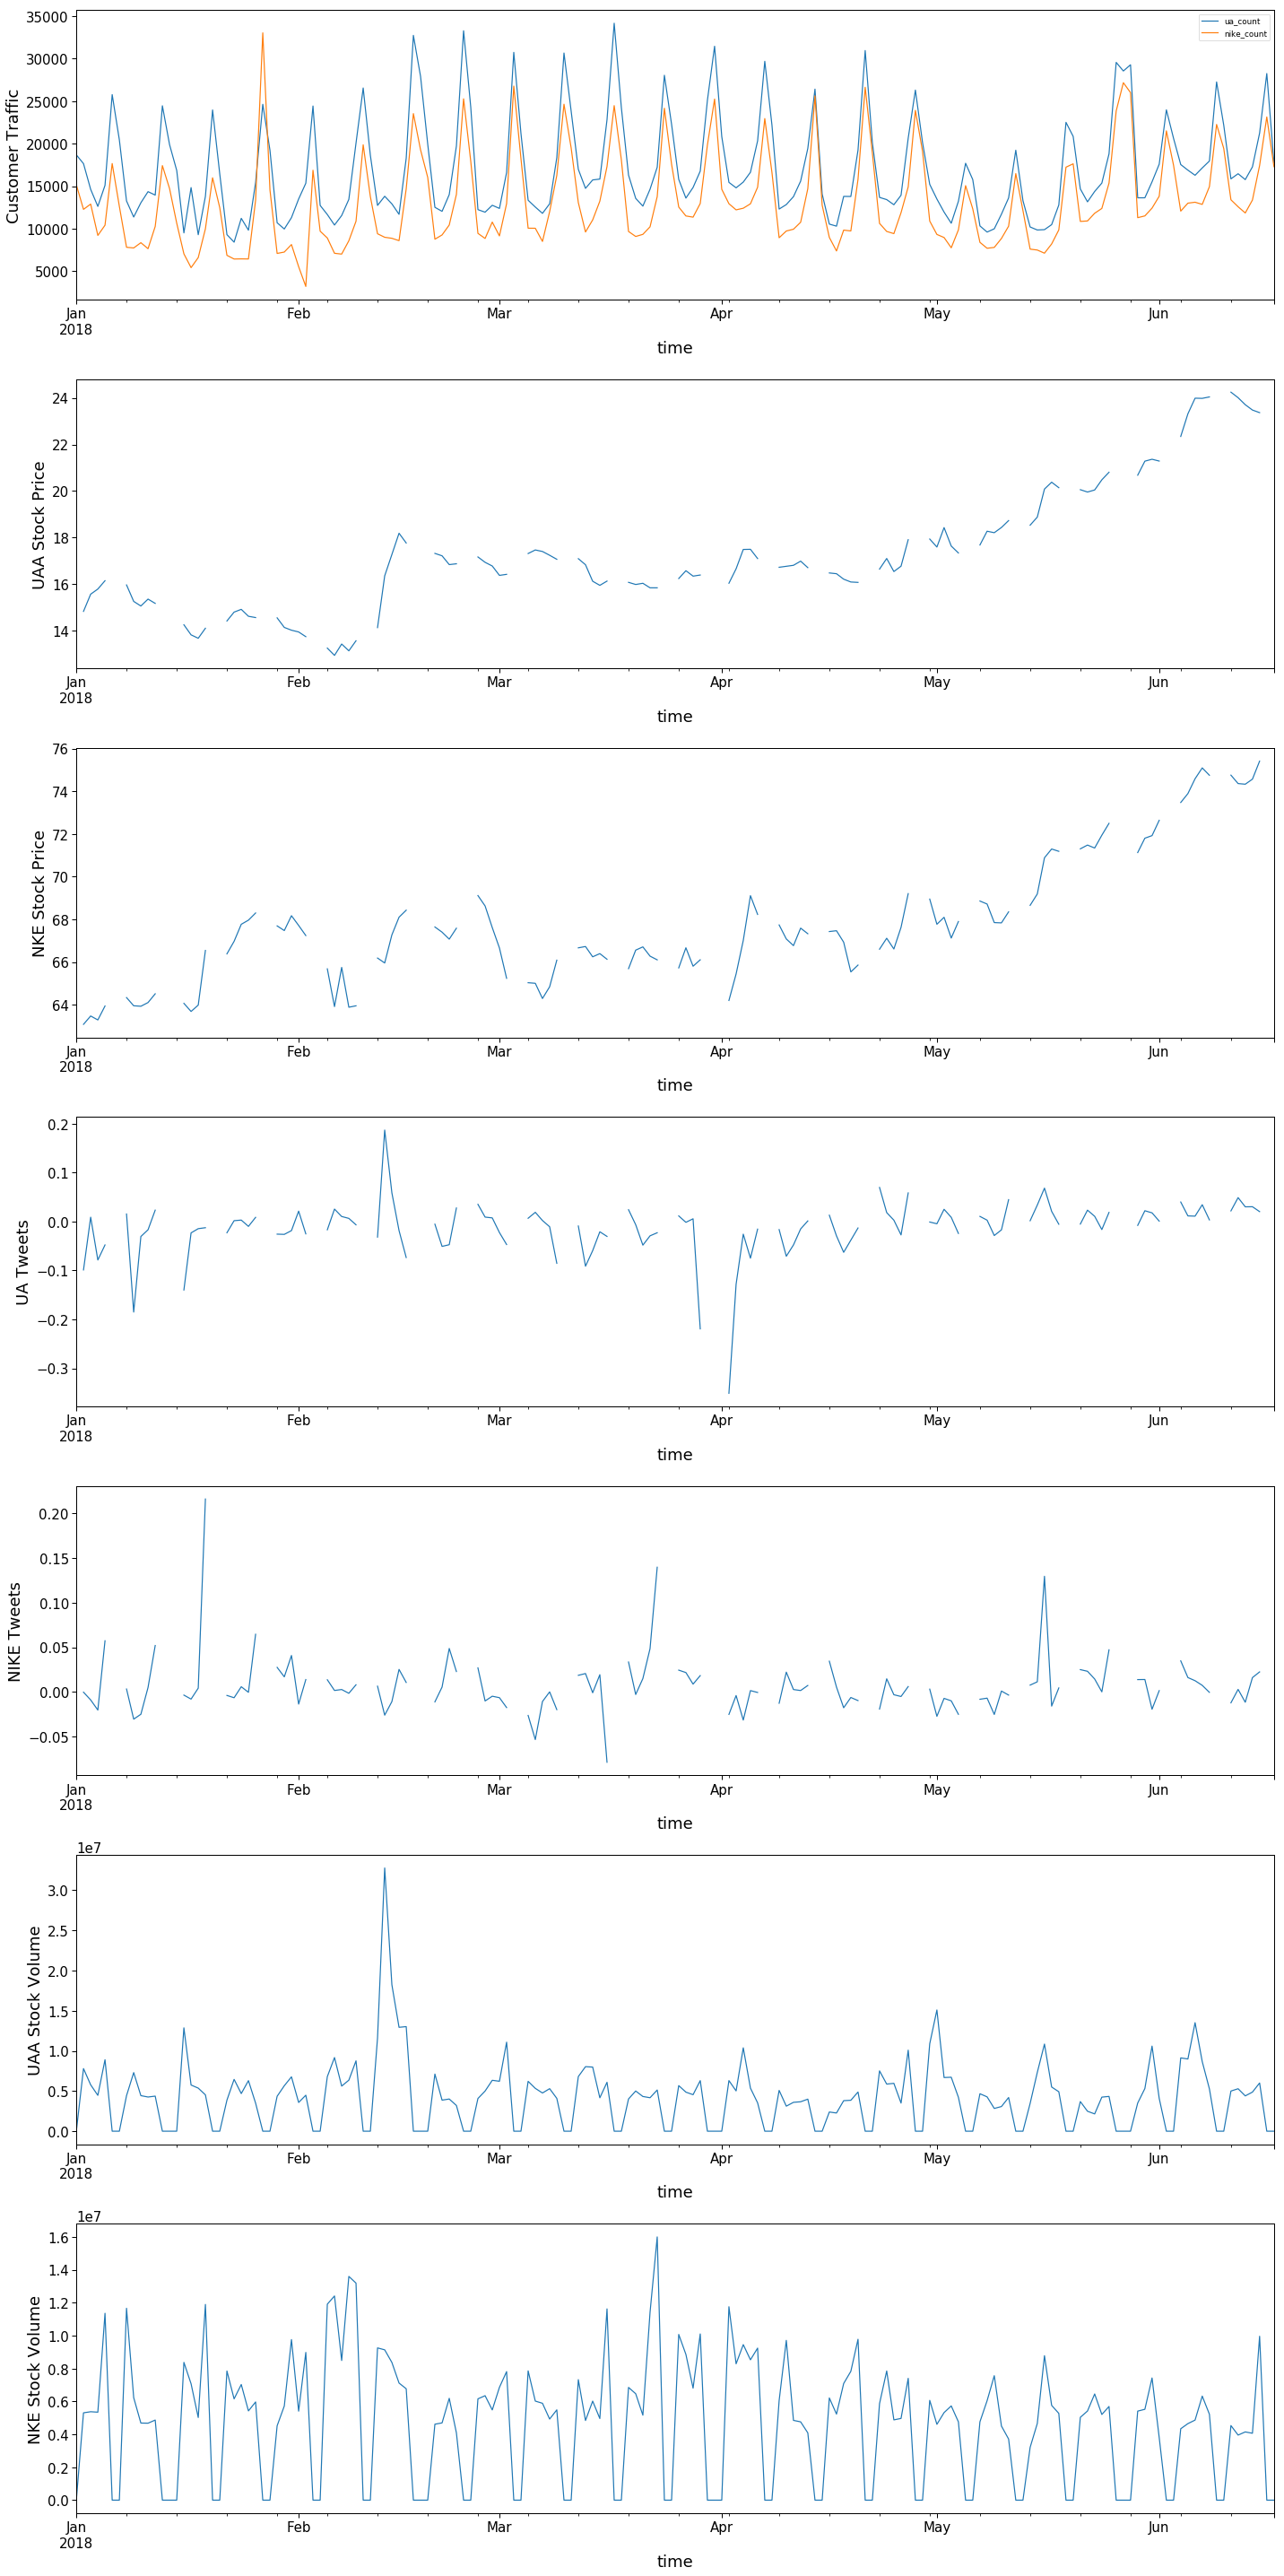

In [57]:
fig=plt.figure(figsize=(20,40))

axes1=fig.add_subplot(7,1,1)
alldata1[['ua_count','nike_count']].resample('D').sum().plot(ax=axes1)

axes2=fig.add_subplot(7,1,2)
alldata1['ua_price'].resample('D').mean().plot(ax=axes2)

axes3=fig.add_subplot(7,1,3)
alldata1['nike_price'].resample('D').mean().plot(ax=axes3)

axes4=fig.add_subplot(7,1,4)
alldata1['ua_tweet'].resample('D').mean().plot(ax=axes4)

axes5=fig.add_subplot(7,1,5)
alldata1['nike_tweet'].resample('D').mean().plot(ax=axes5)

axes6=fig.add_subplot(7,1,6)
alldata1['ua_stkv'].resample('D').sum().plot(ax=axes6)

axes7=fig.add_subplot(7,1,7)
alldata1['nike_stkv'].resample('D').sum().plot(ax=axes7)

axes1.set_ylabel('Customer Traffic')
axes2.set_ylabel('UAA Stock Price')
axes3.set_ylabel('NKE Stock Price')
axes4.set_ylabel('UA Tweets')
axes5.set_ylabel('NIKE Tweets')
axes6.set_ylabel('UAA Stock Volume')
axes7.set_ylabel('NKE Stock Volume')

plt.tight_layout()

# Part 2: Machine Learning

## 4.1 Data Understanding

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_val_predict, TimeSeriesSplit, RepeatedKFold
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [59]:
ua = pd.read_csv('UA.csv')
ua['time'] = pd.DatetimeIndex(pd.to_datetime(ua['Date']))
ua = ua.set_index('time')
ua = ua.rename(columns={'Close':'ua_price', 'Volume':'ua_stkv'})
ua.head()

,Date,Open,High,Low,ua_price,Adj Close,ua_stkv
time,,,,,,,
2018-01-02,2018-01-02,13.45,14.010,13.23,13.97,13.97,6264800
2018-01-03,2018-01-03,13.97,14.470,13.97,14.40,14.40,4839600
2018-01-04,2018-01-04,14.44,14.790,14.28,14.75,14.75,6026600
2018-01-05,2018-01-05,14.75,15.690,14.71,14.73,14.73,9431300
2018-01-08,2018-01-08,14.69,15.139,14.64,14.78,14.78,4838100


In [60]:
nike = pd.read_csv('NIKE.csv')
nike['time'] = pd.DatetimeIndex(pd.to_datetime(nike['Date']))
nike = nike.set_index('time')
nike = nike.rename(columns={'Close':'nike_price', 'Volume':'nike_stkv'})
nike.head()

,Date,Open,High,Low,nike_price,Adj Close,nike_stkv
time,,,,,,,
2018-01-02,2018-01-02,62.849998,63.490002,62.849998,63.490002,63.122215,6511000
2018-01-03,2018-01-03,63.480000,63.660000,62.759998,63.480000,63.112270,6091100
2018-01-04,2018-01-04,63.400002,63.549999,62.549999,63.439999,63.072506,5780500
2018-01-05,2018-01-05,63.700001,64.300003,63.470001,63.980000,63.609375,11632300
2018-01-08,2018-01-08,64.150002,64.709999,63.980000,64.550003,64.176079,11905700


In [61]:
total = pd.read_csv('alldata.csv')
total = total.rename(columns={'Unnamed: 0':'time'})
total['time'] = pd.DatetimeIndex(pd.to_datetime(total['time']))
total = total.set_index('time')
total.head(3)

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff
time,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN


### Transform the original 30-min data to daily data

In [62]:
ua_price = ua.ua_price
nike_price = nike.nike_price
ua_stkv = ua.ua_stkv
nike_stkv = nike.nike_stkv

In [63]:
count = total[['ua_count','nike_count']].resample('D').sum()
price = total[['ua_price','nike_price']].resample('D').last()
stkv = total[['ua_stkv','nike_stkv']].resample('D').sum()
tweet = total[['ua_tweet','nike_tweet']].resample('D').mean()
twtcount = total[['ua_twtcount','nike_twtcount']].resample('D').sum()
total_d = pd.concat([count,ua_price,nike_price,ua_stkv,nike_stkv,tweet,twtcount], axis=1)
total_d.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
time,,,,,,,,,,
2018-01-01,18682,15159,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2018-01-02,17651,12272,13.97,63.490002,6264800.0,6511000.0,-0.098946,-0.000259,233.0,193.0
2018-01-03,14624,12891,14.40,63.480000,4839600.0,6091100.0,0.008900,-0.008924,130.0,166.0
2018-01-04,12620,9205,14.75,63.439999,6026600.0,5780500.0,-0.078617,-0.020256,203.0,159.0
2018-01-05,15099,10409,14.73,63.980000,9431300.0,11632300.0,-0.047855,0.057341,237.0,164.0


In [64]:
total_d['count_ratio'] = total_d.ua_count / total_d.nike_count
total_d['price_ratio'] = total_d.ua_price / total_d.nike_price
total_d['tweet_diff'] = total_d.ua_tweet - total_d.nike_tweet
total_d['stkv_ratio'] = total_d.ua_stkv / total_d.nike_stkv
total_d['twtcount_ratio'] = total_d.ua_twtcount / total_d.nike_twtcount
total_d.head(3)

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01,18682,15159,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.232403,NaN,NaN,NaN,NaN
2018-01-02,17651,12272,13.97,63.490002,6264800.0,6511000.0,-0.098946,-0.000259,233.0,193.0,1.438315,0.220035,-0.098687,0.962187,1.207254
2018-01-03,14624,12891,14.40,63.480000,4839600.0,6091100.0,0.008900,-0.008924,130.0,166.0,1.134435,0.226843,0.017824,0.794536,0.783133


In [65]:
total_d.shape

(168, 15)

### Plot the daily data

Text(0, 0.5, 'Price ($)')

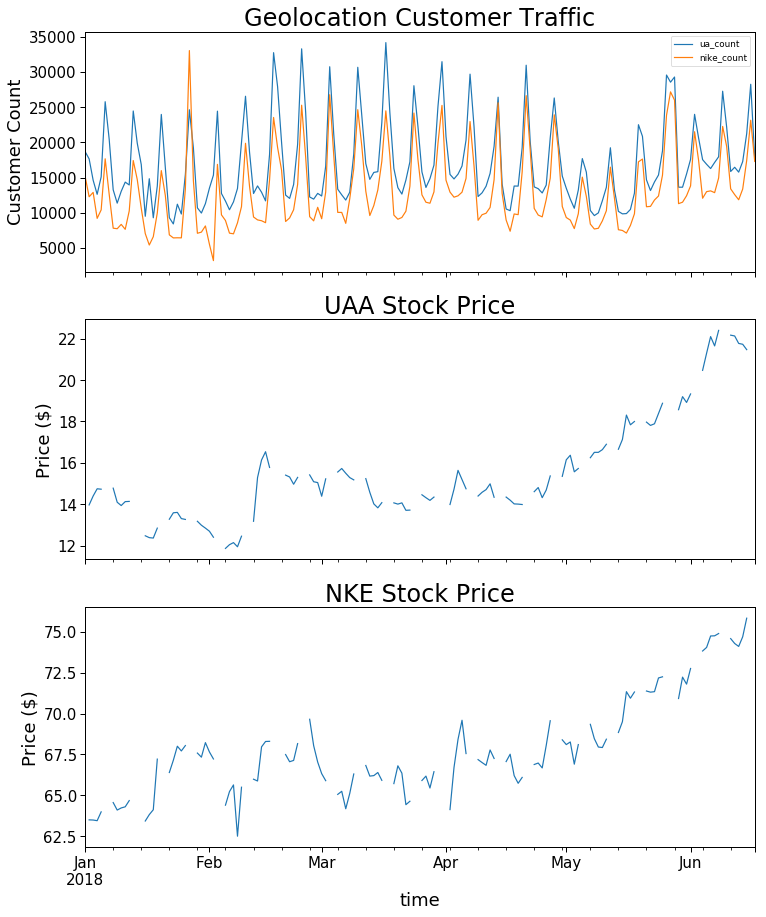

In [66]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (12, 15))

total_d[['ua_count','nike_count']].plot(ax = ax[0])
total_d['ua_price'].plot(ax = ax[1])
total_d['nike_price'].plot(ax = ax[2])

ax[0].set_title('Geolocation Customer Traffic')
ax[1].set_title('UAA Stock Price')
ax[2].set_title('NKE Stock Price')

ax[0].set_ylabel('Customer Count')
ax[1].set_ylabel('Price ($)')
ax[2].set_ylabel('Price ($)')

Text(0, 0.5, 'Ratio')

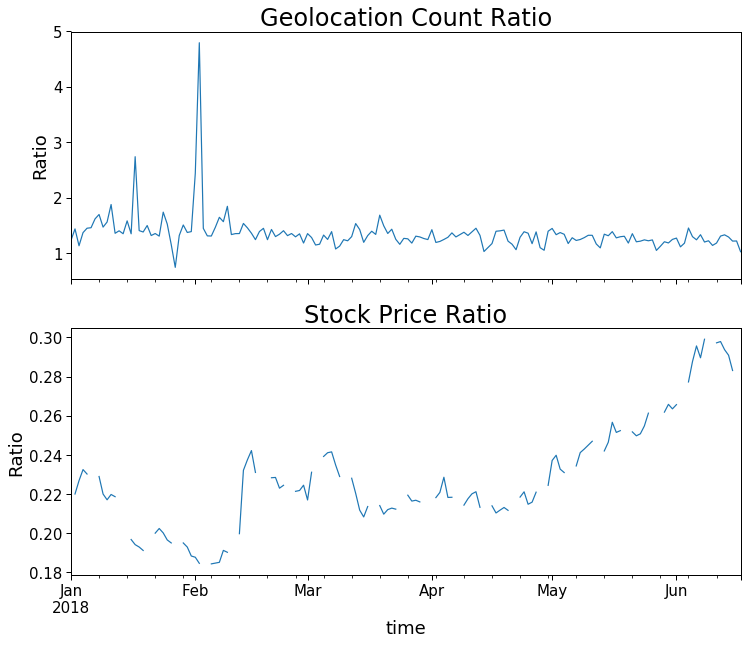

In [67]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12, 10))

total_d['count_ratio'].plot(ax = ax[0])
total_d['price_ratio'].plot(ax = ax[1])

ax[0].set_title('Geolocation Count Ratio')
ax[1].set_title('Stock Price Ratio')

ax[0].set_ylabel('Ratio')
ax[1].set_ylabel('Ratio')

In [68]:
total_d.dropna(inplace = True)
total_d.shape

(115, 15)

## 4.2 Feature Engineering

In [69]:
# create labels for classification (results for tomorrow)
value_ua = total_d.ua_price.shift(-1) - total_d.ua_price
value_nike = total_d.nike_price.shift(-1) - total_d.nike_price
value_ratio = total_d.price_ratio.shift(-1) - total_d.price_ratio

value_ua = np.where(value_ua>=0, 1, 0)
value_nike = np.where(value_nike>=0, 1, 0)
value_ratio = np.where(value_ratio>=0, 1, 0)

print(value_ua.shape)
print(value_nike.shape)
print(value_ratio.shape)

(115,)
(115,)
(115,)


In [70]:
total_d = total_d.rename(columns={
    'ua_count':'geo_ua_count',
    'nike_count':'geo_nike_count',
    'count_ratio':'geo_count_ratio'
})

# add rate of returns
return_ua = total_d.ua_price/total_d.ua_price.shift(1) - 1
return_nike = total_d.nike_price/total_d.nike_price.shift(1) - 1
return_diff = return_ua - return_nike

# add labels and rate of returns to the dataframe
total_d['return_ua'] = return_ua
total_d['return_nike'] = return_nike
total_d['return_diff'] = return_diff
total_d['value_ua'] = value_ua
total_d['value_nike'] = value_nike
total_d['value_ratio'] = value_ratio

total_d[['ua_tweet','nike_tweet','tweet_diff']] = total_d[['ua_tweet','nike_tweet','tweet_diff']].fillna(method = 'bfill')

In [71]:
print(total_d.shape)
print(total_d.dropna().shape)

(115, 21)
(114, 21)


In [72]:
total_d = total_d.dropna()
total_d.head()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,geo_count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
time,,,,,,,,,,,,,,,,,,,,,
2018-01-03,14624,12891,14.40,63.480000,4839600.0,6091100.0,0.008900,-0.008924,130.0,166.0,1.134435,0.226843,0.017824,0.794536,0.783133,0.030780,-0.000158,0.030938,1,0,1
2018-01-04,12620,9205,14.75,63.439999,6026600.0,5780500.0,-0.078617,-0.020256,203.0,159.0,1.370994,0.232503,-0.058361,1.042574,1.276730,0.024306,-0.000630,0.024936,0,1,0
2018-01-05,15099,10409,14.73,63.980000,9431300.0,11632300.0,-0.047855,0.057341,237.0,164.0,1.450572,0.230228,-0.105196,0.810785,1.445122,-0.001356,0.008512,-0.009868,1,1,0
2018-01-08,13262,7812,14.78,64.550003,4838100.0,11905700.0,0.015410,0.003313,84.0,169.0,1.697645,0.228970,0.012097,0.406368,0.497041,0.003394,0.008909,-0.005515,0,0,0
2018-01-09,11369,7732,14.10,64.089996,8791400.0,8771300.0,-0.185152,-0.030452,381.0,188.0,1.470383,0.220003,-0.154700,1.002292,2.026596,-0.046008,-0.007126,-0.038882,0,1,0


In [73]:
total_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2018-01-03 to 2018-06-15
Data columns (total 21 columns):
geo_ua_count       114 non-null int64
geo_nike_count     114 non-null int64
ua_price           114 non-null float64
nike_price         114 non-null float64
ua_stkv            114 non-null float64
nike_stkv          114 non-null float64
ua_tweet           114 non-null float64
nike_tweet         114 non-null float64
ua_twtcount        114 non-null float64
nike_twtcount      114 non-null float64
geo_count_ratio    114 non-null float64
price_ratio        114 non-null float64
tweet_diff         114 non-null float64
stkv_ratio         114 non-null float64
twtcount_ratio     114 non-null float64
return_ua          114 non-null float64
return_nike        114 non-null float64
return_diff        114 non-null float64
value_ua           114 non-null int64
value_nike         114 non-null int64
value_ratio        114 non-null int64
dtypes: float64(16), int64(5)
memory usage: 19

In [74]:
total_d.describe()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,geo_count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
count,114.000000,114.000000,114.000000,114.000000,1.140000e+02,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,14061.035088,10394.929825,15.539561,67.816228,4.220557e+06,7.319367e+06,-0.012455,0.007425,179.666667,222.201754,1.400226,0.228182,-0.019880,0.616095,0.903948,0.004295,0.001678,0.002617,0.491228,0.561404,0.535088
std,2914.368946,2706.752934,2.533865,3.004923,2.687870e+06,2.625862e+06,0.057392,0.033852,268.796817,113.726514,0.385432,0.027476,0.063772,0.368778,1.298169,0.032578,0.015429,0.028122,0.502130,0.498406,0.500969
min,8412.000000,3203.000000,11.870000,62.490002,1.497800e+06,3.453800e+06,-0.351133,-0.078713,45.000000,97.000000,1.076539,0.184345,-0.326005,0.144980,0.145143,-0.117397,-0.047844,-0.098069,0.000000,0.000000,0.000000
25%,12090.000000,8579.500000,14.020000,65.902502,2.666175e+06,5.386575e+06,-0.025796,-0.008734,96.250000,166.000000,1.253092,0.212903,-0.038955,0.387820,0.460901,-0.014039,-0.006510,-0.012918,0.000000,0.000000,0.000000
50%,13655.500000,9961.000000,14.795000,67.194999,3.471650e+06,6.473950e+06,-0.005308,0.002734,129.000000,196.000000,1.337605,0.221291,-0.007725,0.515642,0.626417,-0.000355,0.001142,0.001971,0.000000,1.000000,1.000000
75%,15762.500000,12415.750000,16.475000,68.452499,4.839225e+06,8.770075e+06,0.014791,0.016132,172.750000,232.750000,1.405094,0.241450,0.008203,0.747150,0.936224,0.021951,0.010870,0.014302,1.000000,1.000000,1.000000
max,22815.000000,17438.000000,22.400000,75.839996,2.075110e+07,1.734380e+07,0.186997,0.216114,2408.000000,875.000000,4.791133,0.299065,0.212963,2.175533,11.980100,0.160091,0.048354,0.161758,1.000000,1.000000,1.000000


In [75]:
X = total_d.drop(total_d.columns[[18,19,20]], axis=1) # drop the target
y = total_d.value_ratio.astype('category')

In [76]:
print(X.shape)
print(y.shape)

(114, 18)
(114,)


## 4.3 Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

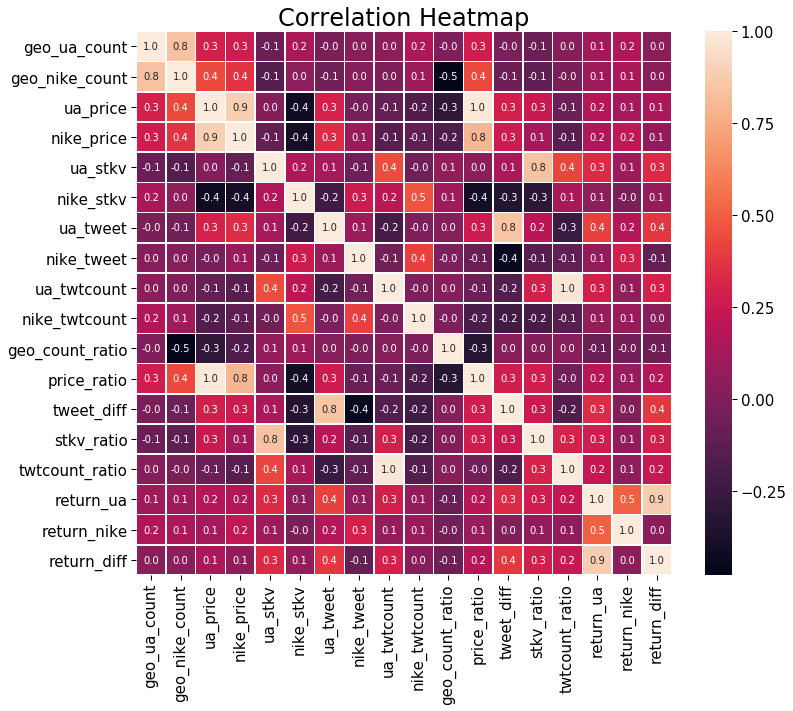

In [77]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.title('Correlation Heatmap', size = 24)

Number of ups:  61
Number of downs :  53


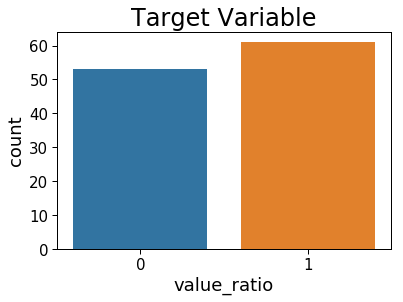

In [78]:
ax = sns.countplot(y, label="Count") 
ups, downs = y.value_counts()
plt.title('Target Variable')
print('Number of ups: ', ups)
print('Number of downs : ', downs)

## 4.4 Feature Selection

### 4.4.1 Variance Filtering

In [79]:
threshold = 0.8
vt = VarianceThreshold().fit(X)

feat_var_threshold = X.columns[vt.variances_ > threshold * (1 - threshold)]
feat_var_threshold

Index(['geo_ua_count', 'geo_nike_count', 'ua_price', 'nike_price', 'ua_stkv',
       'nike_stkv', 'ua_twtcount', 'nike_twtcount', 'twtcount_ratio'],
      dtype='object')

In [80]:
len(feat_var_threshold)

9

### 4.4.2 Importance Ranking

In [81]:
modelr = RandomForestClassifier(random_state = 42)
modelr.fit(X, y)

feature_impr = pd.DataFrame(modelr.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_9r = feature_impr.sort_values("importance", ascending=False).head(9).index
feat_imp_9r

Index(['ua_stkv', 'geo_count_ratio', 'return_nike', 'ua_twtcount',
       'tweet_diff', 'ua_tweet', 'twtcount_ratio', 'nike_stkv', 'nike_price'],
      dtype='object')

In [82]:
modela = AdaBoostClassifier(random_state = 42)
modela.fit(X, y)

feature_impa = pd.DataFrame(modela.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_9a = feature_impa.sort_values("importance", ascending=False).head(9).index
feat_imp_9a

Index(['ua_stkv', 'nike_price', 'price_ratio', 'return_ua', 'nike_stkv',
       'nike_tweet', 'twtcount_ratio', 'geo_ua_count', 'return_nike'],
      dtype='object')

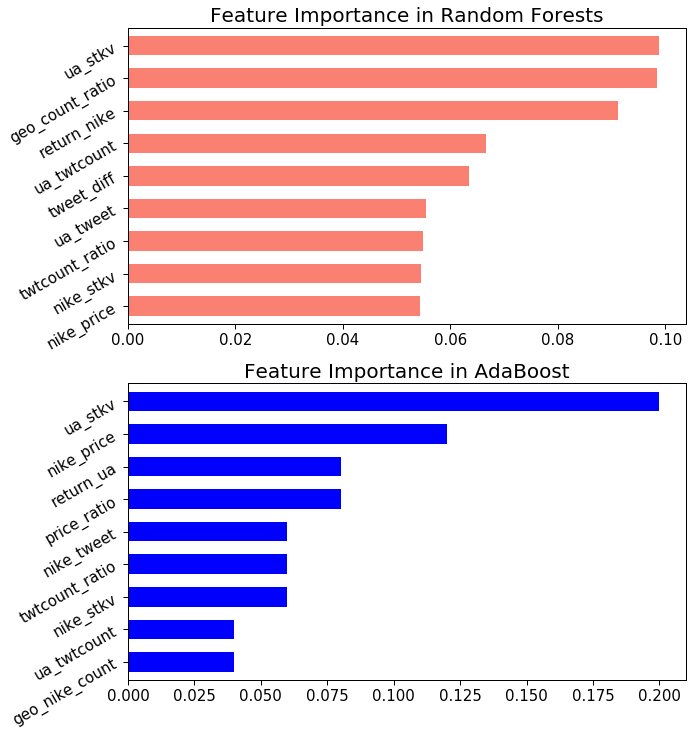

In [83]:
fig, ax = plt.subplots(2, 1, figsize=(10,12))

pd.Series(modelr.feature_importances_, X.columns).sort_values(ascending=True).tail(9).plot.barh(width=0.6, ax=ax[0], color='salmon')
ax[0].set_title('Feature Importance in Random Forests', fontsize=20)
ax[0].tick_params(axis='y', rotation=30)

pd.Series(modela.feature_importances_, X.columns).sort_values(ascending=True).tail(9).plot.barh(width=0.6, ax=ax[1], color='blue')
ax[1].set_title('Feature Importance in AdaBoost', fontsize=20)
ax[1].tick_params(axis='y', rotation=30)

### 4.4.3 SelectKBest with Chi-square

In [84]:
X_minmax = MinMaxScaler().fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_9 = feature_scoring.sort_values('score', ascending=False).head(9)['feature'].values
feat_scored_9

array(['geo_count_ratio', 'ua_twtcount', 'twtcount_ratio',
       'nike_twtcount', 'return_ua', 'geo_nike_count', 'return_diff',
       'nike_tweet', 'nike_stkv'], dtype=object)

### 4.4.4 Recursive Feature Elimination

In [85]:
rfe = RFE(LogisticRegression(), 9)
rfe.fit(X, y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe_9 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_9

array(['ua_price', 'nike_price', 'nike_tweet', 'geo_count_ratio',
       'price_ratio', 'tweet_diff', 'twtcount_ratio', 'return_ua',
       'return_diff'], dtype=object)

### 4.4.5 Put All Together

In [86]:
features = np.hstack([
    feat_var_threshold,
    feat_imp_9r, 
    feat_imp_9a,
    feat_scored_9,
    feat_rfe_9
    ])

fc = pd.DataFrame(pd.Series(features).value_counts(), 
                  columns = ['count']).reset_index().rename(columns = {'index':'feature'})
fc

,feature,count
0,twtcount_ratio,5
1,nike_price,4
2,nike_stkv,4
3,ua_stkv,3
4,geo_count_ratio,3
5,nike_tweet,3
6,ua_twtcount,3
7,return_ua,3
8,geo_ua_count,2
9,geo_nike_count,2


In [87]:
features = fc.feature[fc['count'] > 2].tolist()

print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-twtcount_ratio
	-nike_price
	-nike_stkv
	-ua_stkv
	-geo_count_ratio
	-nike_tweet
	-ua_twtcount
	-return_ua


In [88]:
print(len(features))
X = X.ix[:, features]

8


## 4.5 Modeling

### 5.1 Preparation

In [89]:
random_state = 42
processors = -1
scoring = 'accuracy'
kfold = RepeatedKFold(n_splits=10, n_repeats=10, random_state=random_state)

In [90]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
print('Training set features shape: {}'.format(X_train.shape))
print('Training set target shape: {}'. format((y_train).shape))

Training set features shape: (79, 8)
Training set target shape: (79,)


### 5.2 Simple Modeling

#### Cross Validation

In [92]:
classifiers = [
    SVC(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state = random_state),
    LDA(), 
    QDA(), 
    GaussianNB(), 
    MLPClassifier(random_state = random_state),
    AdaBoostClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(objective = 'binary:logistic', seed = random_state)
]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cla_names = [
    "Support Vector Machine","Decision Tree","Random Forest","KNeighbors",
    "Logistic Regression","Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis","Naive Bayes",
    "Neural Network","AdaBoosting","Gradient Boosting", "XGBoost"
]
    
cv_res = pd.DataFrame({"Method": cla_names,
                       "CrossValMeans": cv_means,
                       "CrossValerrors": cv_std})

cv_res = cv_res.sort_values(['CrossValMeans'],ascending=False).reset_index(drop=True)
cv_res

,Method,CrossValMeans,CrossValerrors
0,Linear Discriminant Analysis,0.577857,0.174718
1,Quadratic Discriminant Analysis,0.576429,0.169992
2,Neural Network,0.568036,0.158490
3,Logistic Regression,0.564821,0.163188
4,KNeighbors,0.518929,0.170978
5,AdaBoosting,0.518750,0.198726
6,Support Vector Machine,0.518393,0.143580
7,Random Forest,0.512857,0.181548
8,Naive Bayes,0.511071,0.160452
9,Gradient Boosting,0.498393,0.160040


In [93]:
pl = pd.DataFrame(data = cv_results, index = cla_names)
pl = pl.T
pl.head()

,Support Vector Machine,Decision Tree,Random Forest,KNeighbors,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Naive Bayes,Neural Network,AdaBoosting,Gradient Boosting,XGBoost
0,0.375,0.125,0.125,0.125,0.250,0.375,0.750,0.875,0.375,0.000,0.125,0.250
1,0.625,0.625,0.500,0.500,0.750,0.750,0.375,0.125,0.625,0.625,0.750,0.500
2,0.375,0.375,0.375,0.625,0.500,0.500,0.625,0.625,0.625,0.500,0.250,0.375
3,0.750,0.500,0.875,0.750,0.625,0.750,0.750,0.500,0.875,0.750,0.625,0.625
4,0.375,0.375,0.500,0.375,0.500,0.375,0.375,0.500,0.125,0.375,0.375,0.250


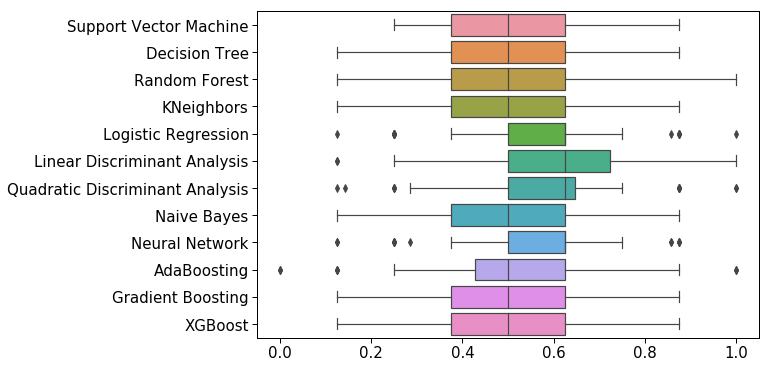

In [94]:
plt.figure(figsize = (9,6))
sns.boxplot(data = pl, orient = 'h')

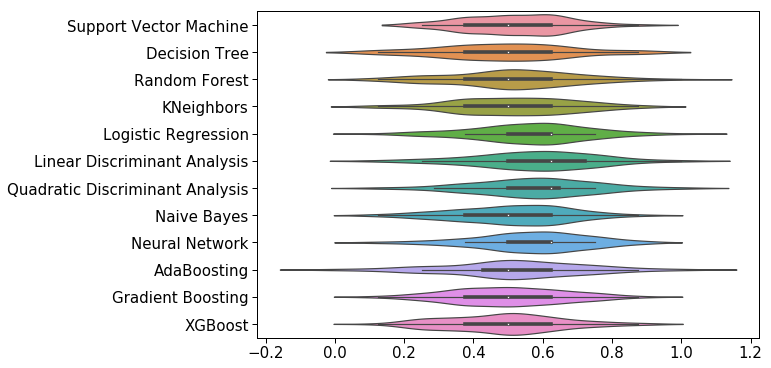

In [95]:
plt.figure(figsize = (9,6))
sns.violinplot(data = pl, orient = 'h')

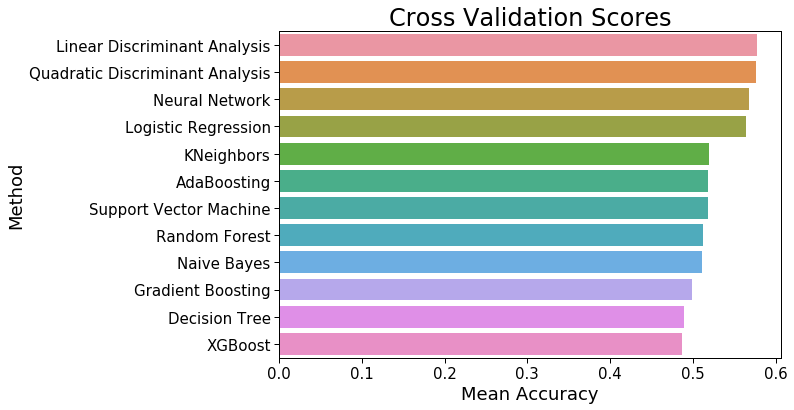

In [96]:
plt.figure(figsize = (9,6))
sns.barplot("CrossValMeans", "Method", data = cv_res)
plt.xlabel("Mean Accuracy")
plt.title("Cross Validation Scores")
plt.show()

#### Using Testing Set

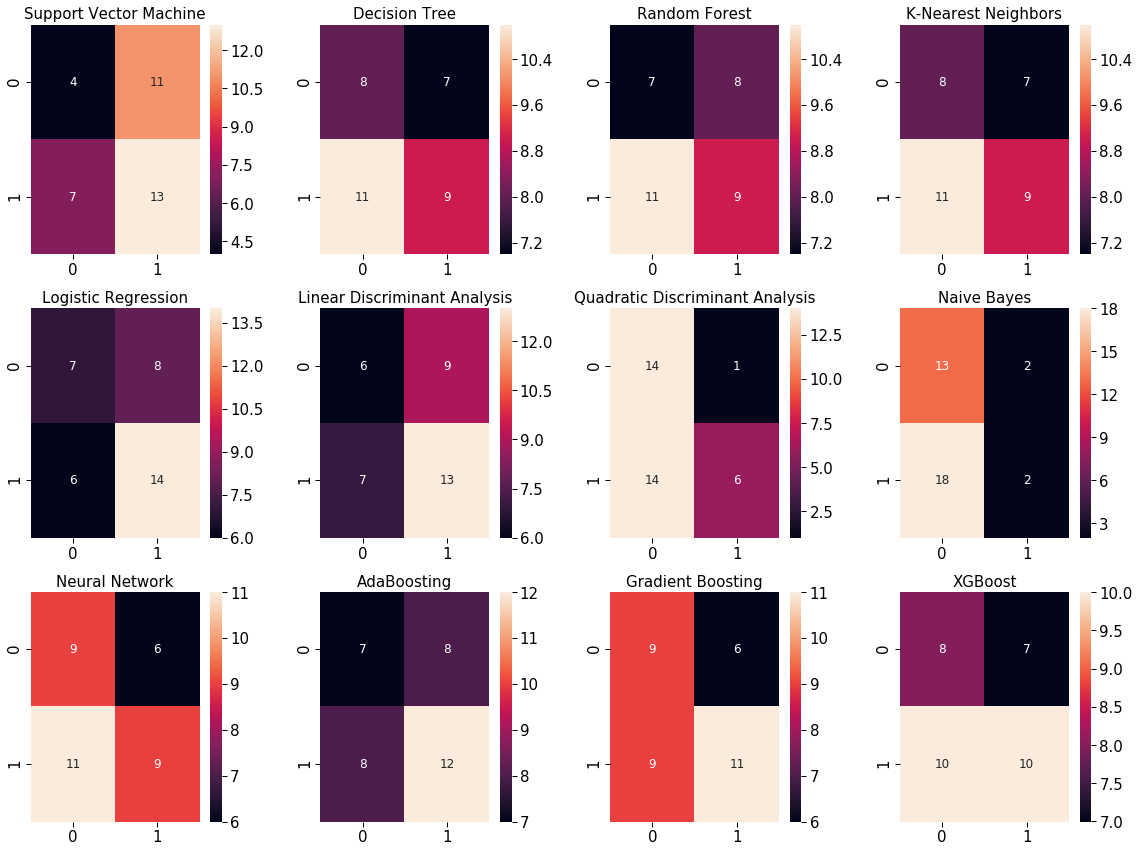

In [98]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15})

f, ax = plt.subplots(3,4,figsize=(16,12))

acc=[]

model=SVC(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,0],annot=True,fmt='d')
ax[0,0].set_title('Support Vector Machine')

model=DecisionTreeClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,1],annot=True,fmt='d')
ax[0,1].set_title('Decision Tree')

model=RandomForestClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,2],annot=True,fmt='d')
ax[0,2].set_title('Random Forest')

model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,3],annot=True,fmt='d')
ax[0,3].set_title('K-Nearest Neighbors')

model=LogisticRegression(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,0],annot=True,fmt='d')
ax[1,0].set_title('Logistic Regression')

model=LDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,1],annot=True,fmt='d')
ax[1,1].set_title('Linear Discriminant Analysis')

model=QDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,2],annot=True,fmt='d')
ax[1,2].set_title('Quadratic Discriminant Analysis')

model=GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,3],annot=True,fmt='d')
ax[1,3].set_title('Naive Bayes')

model=MLPClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,0],annot=True,fmt='d')
ax[2,0].set_title('Neural Network')

model=AdaBoostClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,1],annot=True,fmt='d')
ax[2,1].set_title('AdaBoosting')

model=GradientBoostingClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,2],annot=True,fmt='d')
ax[2,2].set_title('Gradient Boosting')

model=XGBClassifier(objective = 'binary:logistic', seed = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,3],annot=True,fmt='d')
ax[2,3].set_title('XGBoost')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()
plt.show()

In [99]:
accdf = pd.DataFrame({"Accuracy":acc,
                      "Algorithm":["SVM","DT","RF","KNN",
                                   "LR","LDA",
                                   "QDA","NB","NN",
                                   "Ada","GBDT","XGB"]})

accdf = accdf.sort_values(['Accuracy'],ascending=False).reset_index(drop=True)
accdf

,Accuracy,Algorithm
0,0.600000,LR
1,0.571429,QDA
2,0.571429,GBDT
3,0.542857,LDA
4,0.542857,Ada
5,0.514286,NN
6,0.514286,XGB
7,0.485714,SVM
8,0.485714,DT
9,0.485714,KNN


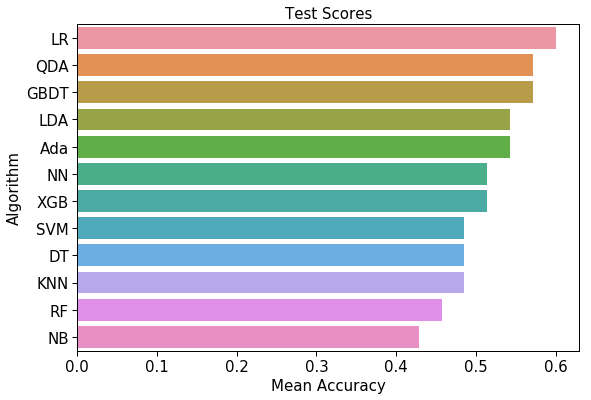

In [100]:
plt.figure(figsize = (9,6))
sns.barplot("Accuracy", "Algorithm", data = accdf)
plt.xlabel("Mean Accuracy")
plt.title("Test Scores")
plt.show()

### 5.3 Hyperparameter Tuning

In [101]:
lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=random_state),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.0001,0.001,0.01]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lr_grid.fit(X_train, y_train)

print("Logistic:")
print("="*30)
print(lr_grid.best_score_)
print(lr_grid.best_params_)

Logistic:
0.5772151898734177
{'C': 0.001, 'penalty': 'l2'}


In [102]:
lda_grid = GridSearchCV(
    estimator = LDA(),
    param_grid = {
        'solver': ['svd', 'lsqr'],
        'n_components': [None, 2, 5]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lda_grid.fit(X_train, y_train)

print("Linear Discriminant Analysis:")
print("="*30)
print(lda_grid.best_score_)
print(lda_grid.best_params_)

Linear Discriminant Analysis:
0.5772151898734177
{'n_components': None, 'solver': 'svd'}


In [103]:
qda_grid = GridSearchCV(
    estimator = QDA(),
    param_grid = {
        'priors': [None, 0, 1],
        'reg_param': [0, 0.1, 0.2]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

qda_grid.fit(X_train, y_train)

print("Quadratic Discriminant Analysis:")
print("="*30)
print(qda_grid.best_score_)
print(qda_grid.best_params_)

Quadratic Discriminant Analysis:
0.5873417721518988
{'priors': 1, 'reg_param': 0}


In [104]:
bag_grid = RandomizedSearchCV(
    estimator = BaggingClassifier(base_estimator=DecisionTreeClassifier(), warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'max_samples': [0.1, 0.3, 0.5],
        'max_features': [0.5, 0.7, 0.9]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

bag_grid.fit(X_train, y_train)

print("Bagging Trees:")
print("="*30)
print(bag_grid.best_score_)
print(bag_grid.best_params_)

Bagging Trees:
0.5455696202531646
{'n_estimators': 100, 'max_samples': 0.3, 'max_features': 0.7}


In [105]:
rf_grid = RandomizedSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [8, 10, 12],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

rf_grid.fit(X_train, y_train)

print("Random Forest:")
print("="*30)
print(rf_grid.best_score_)
print(rf_grid.best_params_)

Random Forest:
0.5392405063291139
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'gini'}


In [106]:
ada_grid = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=random_state),
    param_distributions = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.1, 0.5, 1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

ada_grid.fit(X_train, y_train)

print("Adaboost:")
print("="*30)
print(ada_grid.best_score_)
print(ada_grid.best_params_)

Adaboost:
0.540506329113924
{'n_estimators': 100, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


In [107]:
gbm_grid = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'max_features': [0.05, 0.1, 0.3],
        'learning_rate': [0.05, 0.1, 0.3]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

gbm_grid.fit(X_train, y_train)

print("Gradiant Boosting Machine:")
print("="*30)
print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

Gradiant Boosting Machine:
0.5367088607594936
{'n_estimators': 200, 'max_features': 0.05, 'max_depth': 4, 'learning_rate': 0.3}


In [109]:
xgb_grid = RandomizedSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic', seed = random_state), 
    param_distributions = {
    'learning_rate': [0.05, 0.1, 0.2], 
    'n_estimators': [200, 500, 1000],
    'subsample': [0.1, 0.3, 0.5]
}, 
    n_iter = 10, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors,
    verbose = False) 

xgb_grid.fit(X_train, y_train)

print("XGBoost:")
print("="*30)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

XGBoost:
0.5430379746835443
{'subsample': 0.3, 'n_estimators': 200, 'learning_rate': 0.05}


### 4.4 Stacking & Voting

#### StackingClassifier

In [110]:
clf1 = LogisticRegression(penalty='l2', C=0.001)
clf2 = LDA(solver = 'lsqr', n_components = None)
clf3 = QDA(priors = None, reg_param = 0.1)
clf4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.5, n_estimators=200, warm_start=True, random_state=random_state)
clf5 = RandomForestClassifier(max_depth=12, n_estimators=100, max_features='log2', criterion='entropy', warm_start=True, random_state=random_state)
clf6 = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, algorithm='SAMME')
clf7 = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.05, max_features=0.05, warm_start=True, random_state=random_state)
clf8 = XGBClassifier(objective='binary:logistic', subsample=0.3, n_estimators=200, learning_rate=0.05, random_state=random_state)

lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], 
                          use_probas=True, average_probas=False,
                          meta_classifier=lr)

print('10-time 10-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, sclf], 
                      ['LR', 
                       'LDA', 
                       'Bagging Trees',
                       'Random Forest',
                       'Adaboost',
                       'GBDT',
                       'XGBoost',
                       'Stacking']):

    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
    print("ACC: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-time 10-fold cross validation:

ACC: 0.578 (+/- 0.169) [LR]
ACC: 0.577 (+/- 0.172) [LDA]
ACC: 0.571 (+/- 0.173) [Bagging Trees]
ACC: 0.527 (+/- 0.173) [Random Forest]
ACC: 0.523 (+/- 0.178) [Adaboost]
ACC: 0.525 (+/- 0.174) [GBDT]
ACC: 0.511 (+/- 0.190) [XGBoost]
ACC: 0.542 (+/- 0.170) [Stacking]


#### VotingClassifier

In [111]:
# Create sub models
estimators = [
    ('lr',clf1),
    ('lda',clf2),
    ('qda',clf3),
    ('bag',clf4),
    ('rf',clf5),
    ('ada',clf6),
    ('gbm',clf7),
    ('xgb',clf8)
]

# Create the ensemble model
ensemble = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X_train, y_train, cv = kfold, scoring = scoring, n_jobs = processors)

print("Ensemble:")
print("="*30)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

Ensemble:
(0.546) +/- (0.163)


### 4.5 Conclusion (Using Test Data & Best Models)